In [1]:
#import necessary tools
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#import dataset
btc = pd.read_csv("/Users/steven1/Desktop/steven_smith - Main.csv")

In [3]:
#verify dataset import success
btc.head(30)


,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI,Google trends
0,5/2/2019,5402.42,54003657.44,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,NaN,160.85,73.68,271.97,0.069020,8036.770020,26307.78906,NaN
1,5/1/2019,5350.91,44213520.72,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,NaN,162.19,74.30,267.99,0.070338,8049.640137,26430.14063,NaN
2,4/30/2019,5247.73,51477170.55,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,NaN,155.17,67.95,237.57,0.064661,8095.390137,26592.91016,NaN
3,4/29/2019,5284.86,51477170.55,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,NaN,157.29,69.78,255.55,0.068620,8161.850098,26554.39063,NaN
4,4/28/2019,5271.75,43266088.13,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,NaN,158.50,72.12,264.12,0.070189,NaN,NaN,NaN
5,4/27/2019,5279.47,47687440.20,1.255491,547738.0,381209,6.353030e+12,91.447449,1.227443e+09,NaN,156.27,73.21,264.09,0.069211,NaN,NaN,NaN
6,4/26/2019,5210.30,45160953.30,1.219516,529636.0,384089,6.353030e+12,94.300876,8.217963e+08,1284.20,154.58,71.36,267.19,0.069347,8146.399902,26543.33008,NaN
7,4/25/2019,5466.52,51477170.55,1.234416,595208.0,404279,6.353030e+12,130.674926,1.527179e+09,1280.80,165.91,73.25,279.21,0.072643,8118.680176,26462.08008,NaN
8,4/24/2019,5571.51,36634060.02,1.255767,500657.0,311753,6.353030e+12,96.481210,8.216152e+08,1271.65,171.35,74.75,290.96,0.074524,8102.009766,26597.05078,NaN
9,4/23/2019,5399.37,42318655.54,1.142223,458919.0,342014,6.353030e+12,70.126933,7.303091e+08,1269.50,172.01,76.85,292.79,0.078067,8120.819824,26656.39063,NaN


In [4]:
btc.shape

(3735, 17)

In [5]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 17 columns):
date                             3735 non-null object
BTC Price                        3735 non-null float64
BTC network hashrate             3734 non-null float64
Average BTC block size           3735 non-null float64
NUAU - BTC                       3727 non-null float64
Number TX - BTC                  3735 non-null int64
Difficulty - BTC                 3735 non-null float64
TX fees - BTC                    3735 non-null float64
Estimated TX Volume USD - BTC    3735 non-null float64
Gold in USD                      2662 non-null float64
Ethereum Price                   1336 non-null float64
Litecoin Price                   2728 non-null float64
Bitcoin Cash Price               626 non-null float64
Cardano Price                    556 non-null float64
Nasdaq composite index           2574 non-null float64
DJI                              2574 non-null float64
Google trends     

In [6]:
#Analyse google trends data before removing
trends = btc[:-1576]#btc price info, focus of our study, does not start until 28/04/2013. Therefore remove all rows below
trends = trends[['date','BTC Price','Google trends']]
trends.set_index('date', inplace=True)
trends = trends.dropna()
trends.head(71)


,BTC Price,Google trends
date,,
01/04/2019,4105.36,12
01/03/2019,3853.76,9
01/02/2019,3460.55,10
01/01/2019,3746.71,10
01/12/2018,4024.46,13
01/11/2018,6318.14,13
01/10/2018,6619.85,10
01/09/2018,7044.81,12
01/08/2018,7769.04,13


Text(0.5,0,'Google Trend Interest Ranking')

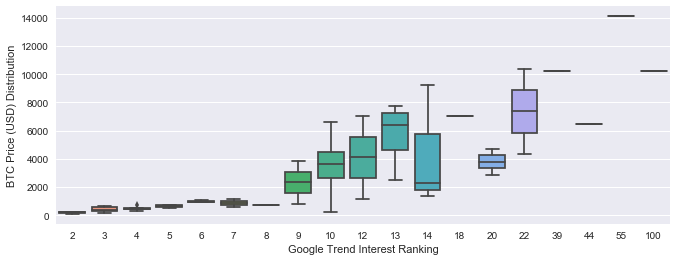

In [7]:
#Visualise google trends data
sns.set(rc={'figure.figsize':(11, 4)})#appropriate size for time series
gtrend=sns.boxplot(data=trends, x='Google trends', y='BTC Price', order=['2','3','4','5','6','7','8','9','10','12','13','14','18','20','22','39','44','55','100'])
gtrend.set_ylabel('BTC Price (USD) Distribution')
gtrend.set_xlabel('Google Trend Interest Ranking')

In [4]:
#deal with missing values
btc = btc[:-1576]#btc price info, focus of our study, does not start until 28/04/2013. Therefore remove all rows below
btc = btc.iloc[24:]#remove top 24 rows due to missing dates and NUAU
btc = btc.drop(columns="Google trends")#remove variable 'Google trends' 


In [5]:
#verify above
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 24 to 2158
Data columns (total 16 columns):
date                             2135 non-null object
BTC Price                        2135 non-null float64
BTC network hashrate             2135 non-null float64
Average BTC block size           2135 non-null float64
NUAU - BTC                       2135 non-null float64
Number TX - BTC                  2135 non-null int64
Difficulty - BTC                 2135 non-null float64
TX fees - BTC                    2135 non-null float64
Estimated TX Volume USD - BTC    2135 non-null float64
Gold in USD                      1523 non-null float64
Ethereum Price                   1312 non-null float64
Litecoin Price                   2135 non-null float64
Bitcoin Cash Price               602 non-null float64
Cardano Price                    532 non-null float64
Nasdaq composite index           1471 non-null float64
DJI                              1471 non-null float64
dtypes: float64(1

In [8]:
btc.head(30)

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
24,01/04/2019,4105.36,44078985.78,1.173566,373888.0,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.910156,26258.41992
25,31/03/2019,4105.46,44078985.78,1.204920,469689.0,377783,6.379270e+12,54.673729,352584524.1,NaN,142.14,60.64,168.64,0.071739,NaN,NaN
26,30/03/2019,4092.14,46615905.83,1.233981,517101.0,369817,6.379270e+12,63.482086,812699052.8,NaN,142.36,61.25,170.30,0.071257,NaN,NaN
27,29/03/2019,4068.30,46298790.82,1.217287,531559.0,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.319824,25928.67969
28,28/03/2019,4087.58,47250135.84,1.199630,527558.0,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.169922,25717.46094
29,27/03/2019,3984.24,42493410.75,1.207859,483706.0,366415,6.379270e+12,36.414956,594756742.5,1309.70,135.45,59.41,160.51,0.062232,7643.379883,25625.58984
30,26/03/2019,3969.23,46933020.83,1.056968,487474.0,322191,6.379270e+12,29.200962,597673169.6,1316.30,135.05,59.51,161.39,0.059206,7691.520020,25657.73047
31,25/03/2019,4024.11,47567250.84,0.753647,379661.0,226166,6.368920e+12,15.676303,290564609.5,1319.55,137.08,60.30,166.11,0.061850,7637.540039,25516.83008
32,24/03/2019,4035.16,43744504.06,0.840117,409451.0,251573,6.068890e+12,17.948863,313796060.0,NaN,138.32,61.24,167.09,0.063723,NaN,NaN
33,23/03/2019,4022.71,48571483.82,0.944549,503337.0,298524,6.068890e+12,27.147020,532934160.0,NaN,137.04,59.79,158.13,0.057993,NaN,NaN


In [6]:
#fix dtypes & verify
btc['date'] = pd.to_datetime(btc['date'], format='%m/%d/%Y')
btc['NUAU - BTC'] = btc['NUAU - BTC'].astype(np.int64)#number of unique addresses used should be whole number
btc['Nasdaq composite index'] = round(btc['Nasdaq composite index'],2)
btc['DJI'] = round(btc['DJI'],2)
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 24 to 2158
Data columns (total 16 columns):
date                             2135 non-null datetime64[ns]
BTC Price                        2135 non-null float64
BTC network hashrate             2135 non-null float64
Average BTC block size           2135 non-null float64
NUAU - BTC                       2135 non-null int64
Number TX - BTC                  2135 non-null int64
Difficulty - BTC                 2135 non-null float64
TX fees - BTC                    2135 non-null float64
Estimated TX Volume USD - BTC    2135 non-null float64
Gold in USD                      1523 non-null float64
Ethereum Price                   1312 non-null float64
Litecoin Price                   2135 non-null float64
Bitcoin Cash Price               602 non-null float64
Cardano Price                    532 non-null float64
Nasdaq composite index           1471 non-null float64
DJI                              1471 non-null float64
dtypes: dat

In [7]:
#set date as index
btc.set_index('date', inplace=True)

In [8]:
#verify the date indexing
btc.loc['2019-03-29']

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-03-29,4068.3,46298790.82,1.217287,531559,393698,6.379270e+12,47.81691,627329922.5,1295.4,139.34,61.17,169.35,0.065763,7729.32,25928.68


In [9]:
#deal with missing values where trading has not been available ie weekends
col = ['Gold in USD','Nasdaq composite index','DJI']
btc.loc[:,col] = btc.loc[:,col].bfill() #fill weekend/public holiday missing data with last trading day data 

In [17]:
#Verify part 2
btc.head(30)

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-04-01,4105.36,44078985.78,1.173566,373888,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.91,26258.42
2019-03-31,4105.46,44078985.78,1.204920,469689,377783,6.379270e+12,54.673729,352584524.1,1295.40,142.14,60.64,168.64,0.071739,7729.32,25928.68
2019-03-30,4092.14,46615905.83,1.233981,517101,369817,6.379270e+12,63.482086,812699052.8,1295.40,142.36,61.25,170.30,0.071257,7729.32,25928.68
2019-03-29,4068.30,46298790.82,1.217287,531559,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.32,25928.68
2019-03-28,4087.58,47250135.84,1.199630,527558,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.17,25717.46
2019-03-27,3984.24,42493410.75,1.207859,483706,366415,6.379270e+12,36.414956,594756742.5,1309.70,135.45,59.41,160.51,0.062232,7643.38,25625.59
2019-03-26,3969.23,46933020.83,1.056968,487474,322191,6.379270e+12,29.200962,597673169.6,1316.30,135.05,59.51,161.39,0.059206,7691.52,25657.73
2019-03-25,4024.11,47567250.84,0.753647,379661,226166,6.368920e+12,15.676303,290564609.5,1319.55,137.08,60.30,166.11,0.061850,7637.54,25516.83
2019-03-24,4035.16,43744504.06,0.840117,409451,251573,6.068890e+12,17.948863,313796060.0,1311.30,138.32,61.24,167.09,0.063723,7642.67,25502.32


In [16]:
#verify bottom rows
btc.tail(10)

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2013-05-07,112.25,88.157562,0.159966,89457,59215,1.007629e+07,45.045019,48700263.0,1444.25,NaN,3.37,NaN,NaN,3396.63,15056.20
2013-05-06,115.98,81.645923,0.153041,64381,51244,1.007629e+07,50.999403,32747255.0,1469.25,NaN,3.59,NaN,NaN,3392.97,14968.89
2013-05-05,112.90,77.137866,0.150220,55974,49419,1.007629e+07,38.145919,22070654.0,1469.25,NaN,3.49,NaN,NaN,3378.63,14973.96
2013-05-04,98.10,77.137866,0.149233,56115,48349,1.007629e+07,42.747962,19138832.0,1469.25,NaN,3.03,NaN,NaN,3378.63,14973.96
2013-05-03,106.25,73.631600,0.175325,70210,55859,1.007629e+07,49.207822,34738967.0,1469.25,NaN,3.39,NaN,NaN,3378.63,14973.96
2013-05-02,116.38,72.128914,0.181150,67744,57278,1.007629e+07,55.084329,33019004.0,1469.25,NaN,3.78,NaN,NaN,3340.62,14831.58
2013-05-01,139.00,70.626228,0.159960,61672,50437,1.007629e+07,35.903448,32988744.0,1454.75,NaN,4.29,NaN,NaN,3299.13,14700.95
2013-04-30,144.00,74.633390,0.176944,60887,48795,1.007629e+07,54.593614,32294820.0,1469.00,NaN,4.40,NaN,NaN,3328.79,14839.80
2013-04-29,134.44,80.746756,0.133635,73687,50009,8.974296e+06,35.830093,41199388.0,1467.50,NaN,4.37,NaN,NaN,3307.02,14818.75


In [10]:
#check for missing dates
pd.date_range(start = '2013-04-28', end = '2019-04-01').difference(btc.index)

DatetimeIndex(['2015-11-23', '2015-11-24', '2015-11-25', '2015-12-28',
               '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-01',
               '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2018-06-14', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
               '2018-08-19', '2018-09-11'],
              dtype='datetime64[ns]', freq=None)

In [11]:
#fill in missing dates with previous dates data
btc = btc.sort_index().asfreq(freq='D', method='ffill')
btc.tail()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-03-28,4087.58,47250135.84,1.199630,527558,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.17,25717.46
2019-03-29,4068.30,46298790.82,1.217287,531559,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.32,25928.68
2019-03-30,4092.14,46615905.83,1.233981,517101,369817,6.379270e+12,63.482086,812699052.8,1295.40,142.36,61.25,170.30,0.071257,7729.32,25928.68
2019-03-31,4105.46,44078985.78,1.204920,469689,377783,6.379270e+12,54.673729,352584524.1,1295.40,142.14,60.64,168.64,0.071739,7729.32,25928.68
2019-04-01,4105.36,44078985.78,1.173566,373888,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.91,26258.42


In [12]:
#validate the above part 1
btc.loc['2015-11-23']

BTC Price                        3.269800e+02
BTC network hashrate             5.826535e+05
Average BTC block size           4.823322e-01
NUAU - BTC                       3.346880e+05
Number TX - BTC                  1.588520e+05
Difficulty - BTC                 6.584826e+10
TX fees - BTC                    2.520809e+01
Estimated TX Volume USD - BTC    1.022655e+08
Gold in USD                      1.081750e+03
Ethereum Price                   9.797650e-01
Litecoin Price                   3.160000e+00
Bitcoin Cash Price                        NaN
Cardano Price                             NaN
Nasdaq composite index           5.104920e+03
DJI                              1.782381e+04
Name: 2015-11-23 00:00:00, dtype: float64

In [13]:
#validate the above part 2
pd.date_range(start = '2013-04-28', end = '2019-04-01').difference(btc.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [19]:
#Verify cleansing 
btc.info() #note one null value for gold/nasdaq/dji due to the first date 28/04/13 being a Sunday

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2165 entries, 2013-04-28 to 2019-04-01
Freq: D
Data columns (total 15 columns):
BTC Price                        2165 non-null float64
BTC network hashrate             2165 non-null float64
Average BTC block size           2165 non-null float64
NUAU - BTC                       2165 non-null int64
Number TX - BTC                  2165 non-null int64
Difficulty - BTC                 2165 non-null float64
TX fees - BTC                    2165 non-null float64
Estimated TX Volume USD - BTC    2165 non-null float64
Gold in USD                      2164 non-null float64
Ethereum Price                   1342 non-null float64
Litecoin Price                   2165 non-null float64
Bitcoin Cash Price               618 non-null float64
Cardano Price                    548 non-null float64
Nasdaq composite index           2164 non-null float64
DJI                              2164 non-null float64
dtypes: float64(13), int64(2)
memory usage: 350.

Text(0.5, 0, 'Year')

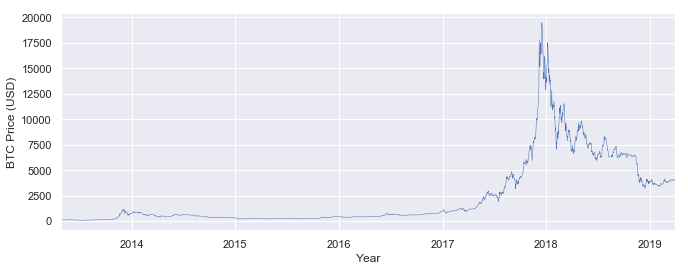

In [14]:
#BTC/USD Price Chart, source Yahoo Finance 
sns.set(rc={'figure.figsize':(11, 4)})#appropriate size for time series 
alltimebtcprice=btc['BTC Price'].plot(linewidth=0.5)
alltimebtcprice.set_ylabel('BTC Price (USD)')
alltimebtcprice.set_xlabel('Year')

In [23]:
#simple moving averages - 10, 50 and 200-day
tendayma = btc['BTC Price'].rolling(10, center=True).mean()
fiftydayma = btc['BTC Price'].rolling(50, center=True).mean()
twohundredma = btc['BTC Price'].rolling(200, center=True).mean()

In [24]:
#validate above
tendayma.head(30)

date
2013-04-28        NaN
2013-04-29        NaN
2013-04-30        NaN
2013-05-01        NaN
2013-05-02        NaN
2013-05-03    121.460
2013-05-04    118.890
2013-05-05    116.766
2013-05-06    113.646
2013-05-07    111.516
2013-05-08    111.442
2013-05-09    112.299
2013-05-10    114.287
2013-05-11    114.137
2013-05-12    113.961
2013-05-13    114.557
2013-05-14    115.947
2013-05-15    116.948
2013-05-16    117.918
2013-05-17    118.350
2013-05-18    119.075
2013-05-19    119.973
2013-05-20    120.805
2013-05-21    122.975
2013-05-22    124.752
2013-05-23    126.281
2013-05-24    126.908
2013-05-25    127.487
2013-05-26    128.462
2013-05-27    129.140
Freq: D, Name: BTC Price, dtype: float64

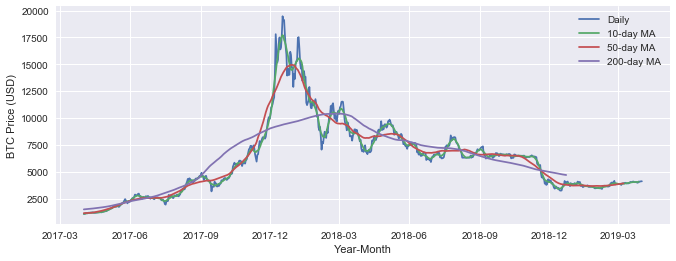

In [25]:
#plot daily price, 10-day, 50-day and 200-day MA time series together for last 2 years
start, end = '2017-04', '2019-04'
fig, ax = plt.subplots()
ax.plot(btc.loc[start:end, 'BTC Price'], label='Daily')
ax.plot(tendayma.loc[start:end], label='10-day MA')
ax.plot(fiftydayma.loc[start:end], label='50-day MA')
ax.plot(twohundredma.loc[start:end], label='200-day MA')
ax.set_ylabel('BTC Price (USD)')
ax.set_xlabel('Year-Month')
ax.legend();

In [24]:
#BTC/USD seasonality breakdown
data_2014 = btc['2014']
#data_2014=data_2014.iloc[::-1]
data_2015 = btc['2015']
#data_2015=data_2015.iloc[::-1]
data_2016 = btc['2016']
#data_2016=data_2016.iloc[::-1]
data_2017 = btc['2017']
#data_2017=data_2017.iloc[::-1]
data_2018 = btc['2018']
#data_2018=data_2018.iloc[::-1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[[Text(0,0,'1'),
  Text(0,0,'2'),
  Text(0,0,'3'),
  Text(0,0,'4'),
  Text(0,0,'5'),
  Text(0,0,'6'),
  Text(0,0,'7'),
  Text(0,0,'8'),
  Text(0,0,'9'),
  Text(0,0,'10'),
  Text(0,0,'11'),
  Text(0,0,'12')]]

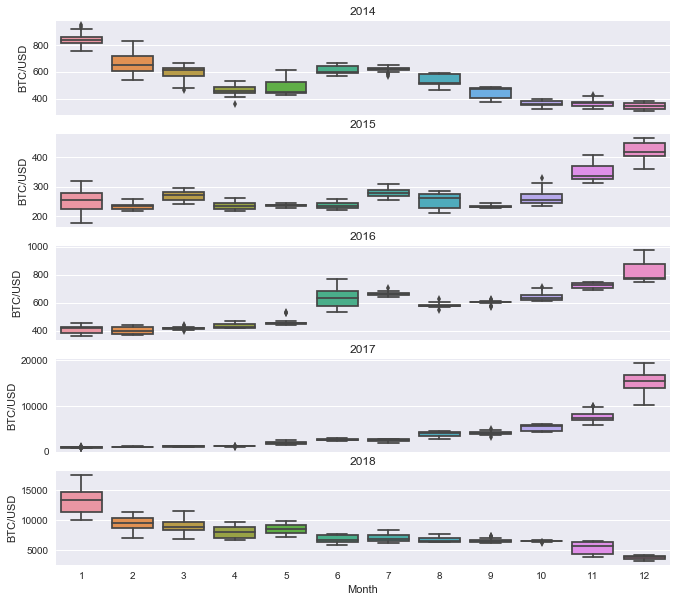

In [25]:
#BTC/USD yearly seasonality
data_2014['Month']=data_2014.index.to_period('M')
data_2015['Month']=data_2015.index.to_period('M')
data_2016['Month']=data_2016.index.to_period('M')
data_2017['Month']=data_2017.index.to_period('M')
data_2018['Month']=data_2018.index.to_period('M')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(11,10), sharex=True)
sns.boxplot(data=data_2014, x='Month', y='BTC Price', ax=ax1)
sns.boxplot(data=data_2015, x='Month', y='BTC Price', ax=ax2)
sns.boxplot(data=data_2016, x='Month', y='BTC Price', ax=ax3)
sns.boxplot(data=data_2017, x='Month', y='BTC Price', ax=ax4)
sns.boxplot(data=data_2018, x='Month', y='BTC Price', ax=ax5)
ax1.set_title("2014")
ax2.set_title("2015")
ax3.set_title("2016")
ax4.set_title("2017")
ax5.set_title("2018")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("BTC/USD")
ax2.set_ylabel("BTC/USD")
ax3.set_ylabel("BTC/USD")
ax4.set_ylabel("BTC/USD")
ax5.set_ylabel("BTC/USD")
ax5.set(xticklabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[[Text(0,0,'Monday'),
  Text(0,0,'Tuesday'),
  Text(0,0,'Wednesday'),
  Text(0,0,'Thursday'),
  Text(0,0,'Friday'),
  Text(0,0,'Saturday'),
  Text(0,0,'Sunday')]]

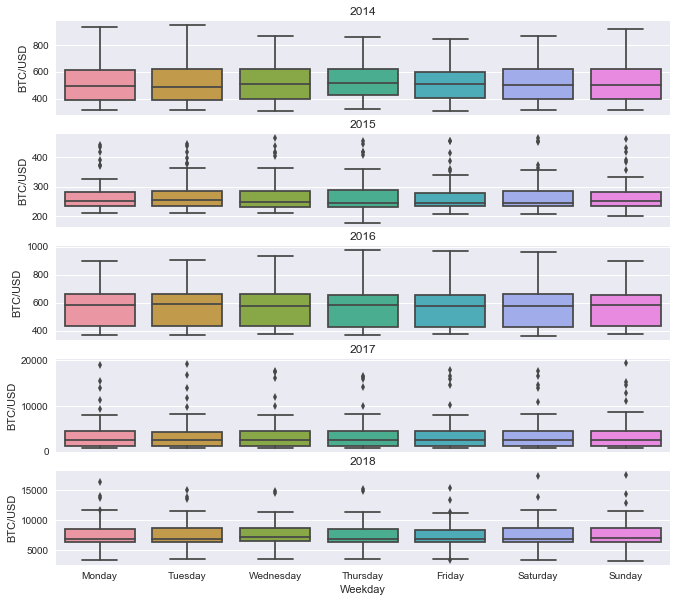

In [26]:
#BTC/USD weekly seasonality
data_2014['Weekday']=data_2014.index.weekday
data_2015['Weekday']=data_2015.index.weekday
data_2016['Weekday']=data_2016.index.weekday
data_2017['Weekday']=data_2017.index.weekday
data_2018['Weekday']=data_2018.index.weekday
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(11,10), sharex=True)
sns.boxplot(data=data_2014, x='Weekday', y='BTC Price', ax=ax1)
sns.boxplot(data=data_2015, x='Weekday', y='BTC Price', ax=ax2)
sns.boxplot(data=data_2016, x='Weekday', y='BTC Price', ax=ax3)
sns.boxplot(data=data_2017, x='Weekday', y='BTC Price', ax=ax4)
sns.boxplot(data=data_2018, x='Weekday', y='BTC Price', ax=ax5)
ax1.set_title("2014")
ax2.set_title("2015")
ax3.set_title("2016")
ax4.set_title("2017")
ax5.set_title("2018")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("BTC/USD")
ax2.set_ylabel("BTC/USD")
ax3.set_ylabel("BTC/USD")
ax4.set_ylabel("BTC/USD")
ax5.set_ylabel("BTC/USD")
ax5.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [19]:
#review descriptive stats
btc.describe()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
count,2165.000000,2.165000e+03,2165.000000,2.165000e+03,2165.000000,2.165000e+03,2165.000000,2.165000e+03,2164.000000,1342.000000,2165.000000,618.000000,548.000000,2164.000000,2164.000000
mean,2370.382984,9.352375e+06,0.618794,3.402531e+05,175870.960739,1.270609e+12,79.931200,4.288602e+08,1251.731493,204.423694,31.673510,767.034094,0.168769,5449.564626,19536.761114
std,3357.781454,1.567847e+07,0.329188,1.829909e+05,94207.693410,2.151883e+12,130.667308,6.955409e+08,72.917751,266.243163,52.818662,632.921089,0.187290,1271.472787,3505.390450
min,68.500000,7.062623e+01,0.072090,3.750600e+04,28865.000000,8.974296e+06,8.003076,9.320100e+06,1049.400000,0.000000,1.150000,77.370000,0.018414,3299.130000,14659.560000
25%,338.580000,2.594977e+05,0.286130,1.734140e+05,79512.000000,3.500248e+10,16.226609,5.473189e+07,1207.987500,10.460000,3.350000,326.630000,0.043397,4517.227500,16798.335000
50%,622.270000,1.284309e+06,0.681075,3.702110e+05,188238.000000,1.668520e+11,30.820251,1.490719e+08,1256.725000,97.460000,4.600000,590.520000,0.094973,5055.920000,18015.950000
75%,3686.970000,8.380132e+06,0.927419,4.727840e+05,246692.000000,1.123860e+12,68.340000,5.798109e+08,1304.562500,303.412500,43.400000,1080.532500,0.210502,6501.150000,22578.617500
max,19475.800000,6.186626e+07,1.304964,1.072861e+06,490644.000000,7.454970e+12,1495.946477,5.760245e+09,1469.250000,1397.480000,359.130000,3909.000000,1.170000,8109.690000,26828.390000


Text(0.5,0,'Year')

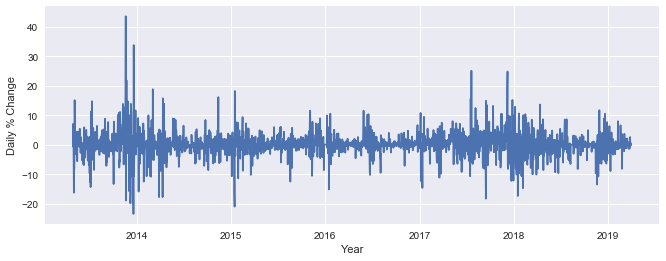

In [63]:
#BTC daily % returns
DRBTC=btc['BTC Price'].pct_change().mul(100)
DRBTC=DRBTC.rename(columns={'BTC Price':'Bitcoin'})
start, end = '2013-04-28', '2019-04-01'
fig, ax = plt.subplots()
ax.plot(DRBTC.loc[start:end])
ax.set_ylabel('Daily % Change')
ax.set_xlabel('Year')

Text(0.5,0,'Daily % Change')

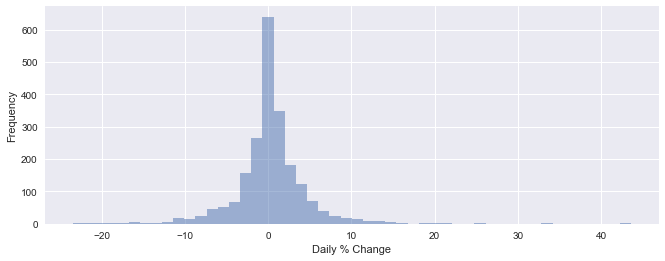

In [99]:
#Distribution of daily price swings
DRBTC.plot.hist(alpha=0.5, bins=50)
plt.xlabel('Daily % Change')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


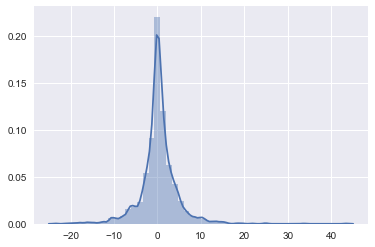

In [123]:
test = DRBTC.loc['2013-04-29':'2019-04-01']
sns.distplot(test, norm_hist=False)

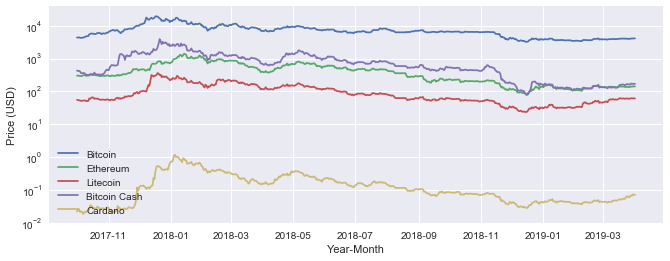

In [44]:
#compare altcoins 
cryptos=btc[['BTC Price','Ethereum Price','Litecoin Price','Bitcoin Cash Price','Cardano Price']]
cryptos=cryptos.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin', 'Bitcoin Cash Price': 'Bitcoin Cash', 'Cardano Price': 'Cardano'})
cryptos=cryptos.loc['2017-10-01':'2019-04-02']
start, end = '2017-10-01', '2019-04-01'
fig, ax = plt.subplots()
ax.plot(cryptos.loc[start:end, 'Bitcoin'])
ax.plot(cryptos.loc[start:end, 'Ethereum'])
ax.plot(cryptos.loc[start:end, 'Litecoin'])
ax.plot(cryptos.loc[start:end, 'Bitcoin Cash'])
ax.plot(cryptos.loc[start:end, 'Cardano'])
ax.set_ylabel('Price (USD)')
ax.set_yscale('log')
ax.set_xlabel('Year-Month')
ax.legend();


Text(0,0.5,'Return From Price as of XYZ')

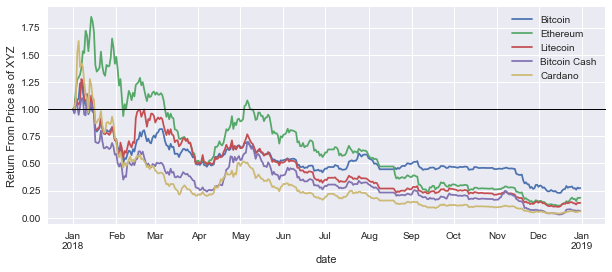

In [113]:
#alternative visualisation to the above, by normalising data
normcryptos=btc[['BTC Price','Ethereum Price','Litecoin Price','Bitcoin Cash Price','Cardano Price']]
normcryptos=normcryptos.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin', 'Bitcoin Cash Price': 'Bitcoin Cash', 'Cardano Price': 'Cardano'})
normcryptos=normcryptos.loc['2018-01-01':'2018-12-31']
returnfstart = normcryptos.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(10,4)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Price as of XYZ')

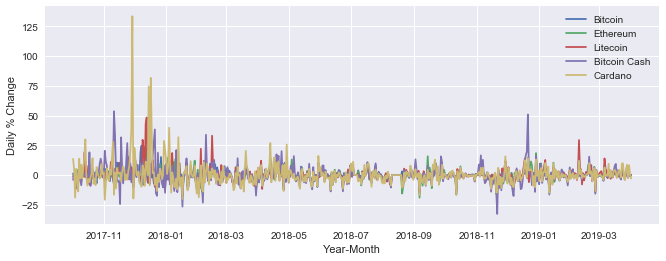

In [55]:
#compare altcoin daily returns 
DRcryptos=cryptos.pct_change().mul(100)
DRcryptos=DRcryptos.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin', 'Bitcoin Cash Price': 'Bitcoin Cash', 'Cardano Price': 'Cardano'})
start, end = '2017-10-01', '2019-04-01'
fig, ax = plt.subplots()
ax.plot(DRcryptos.loc[start:end, 'Bitcoin'])
ax.plot(DRcryptos.loc[start:end, 'Ethereum'])
ax.plot(DRcryptos.loc[start:end, 'Litecoin'])
ax.plot(DRcryptos.loc[start:end, 'Bitcoin Cash'])
ax.plot(DRcryptos.loc[start:end, 'Cardano'])
ax.set_ylabel('Daily % Change')
ax.set_xlabel('Year-Month')
ax.legend();

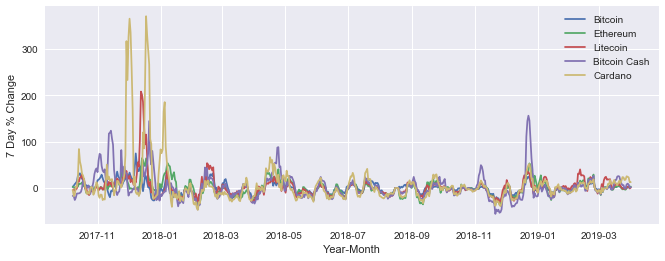

In [57]:
#compare altcoin 7-day returns
WRcryptos=cryptos.pct_change(periods=7).mul(100)
WRcryptos=WRcryptos.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin', 'Bitcoin Cash Price': 'Bitcoin Cash', 'Cardano Price': 'Cardano'})
start, end = '2017-10-02', '2019-04-02'
fig, ax = plt.subplots()
ax.plot(WRcryptos.loc[start:end, 'Bitcoin'])
ax.plot(WRcryptos.loc[start:end, 'Ethereum'])
ax.plot(WRcryptos.loc[start:end, 'Litecoin'])
ax.plot(WRcryptos.loc[start:end, 'Bitcoin Cash'])
ax.plot(WRcryptos.loc[start:end, 'Cardano'])
ax.set_ylabel('7 Day % Change')
ax.set_xlabel('Year-Month')
ax.legend();

In [27]:
#compare pearson correlation coefficient between cryptocurrencies - note time-span is shortened due to life span of cardano  
cryptopear=cryptos.pct_change().corr(method='pearson')
print(cryptopear)

               Bitcoin  Ethereum  Litecoin  Bitcoin Cash   Cardano
Bitcoin       1.000000  0.642687  0.632248      0.457145  0.416770
Ethereum      0.642687  1.000000  0.765087      0.610588  0.473254
Litecoin      0.632248  0.765087  1.000000      0.493204  0.402780
Bitcoin Cash  0.457145  0.610588  0.493204      1.000000  0.296403
Cardano       0.416770  0.473254  0.402780      0.296403  1.000000


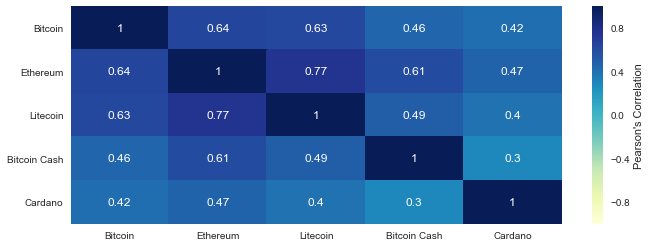

In [28]:
#visualise the correlation
sns.heatmap(cryptopear, xticklabels=cryptopear.columns, yticklabels=cryptopear.columns, cbar_kws={'label': "Pearson's Correlation"}, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)

In [29]:
#Compare BEL cryptos (longer time-span)
bel=btc[['BTC Price','Ethereum Price','Litecoin Price']]
bel=bel.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin'})
bel=bel.loc['2015-08-07':'2019-04-02']
bel=bel.pct_change().corr(method='pearson')
print(bel)

           Bitcoin  Ethereum  Litecoin
Bitcoin   1.000000  0.382815  0.571513
Ethereum  0.382815  1.000000  0.363848
Litecoin  0.571513  0.363848  1.000000


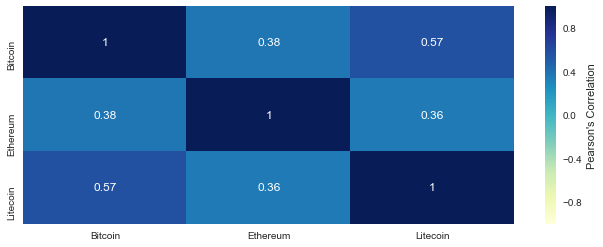

In [30]:
#visualise the correlation
sns.heatmap(bel, xticklabels=bel.columns, yticklabels=bel.columns, cbar_kws={'label': "Pearson's Correlation"}, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)

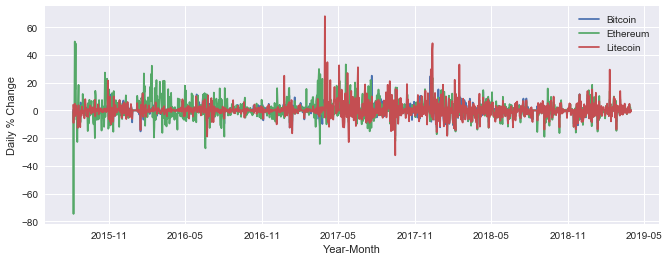

In [89]:
#compare BEL daily returns 
BELDRcryptos=btc[['BTC Price','Ethereum Price','Litecoin Price']]
BELDRcryptos=BELDRcryptos.loc['2015-08-07':'2019-04-02']
BELDRcryptos=BELDRcryptos.pct_change().mul(100)
BELDRcryptos=BELDRcryptos.rename(columns={'BTC Price':'Bitcoin', 'Ethereum Price':'Ethereum', 'Litecoin Price':'Litecoin'})
start, end = '2015-08-07', '2019-04-02'
fig, ax = plt.subplots()
ax.plot(BELDRcryptos.loc[start:end, 'Bitcoin'])
ax.plot(BELDRcryptos.loc[start:end, 'Ethereum'])
ax.plot(BELDRcryptos.loc[start:end, 'Litecoin'])
ax.set_ylabel('Daily % Change')
ax.set_xlabel('Year-Month')
ax.legend();

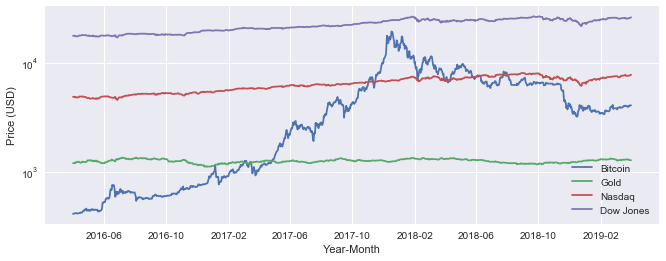

In [65]:
#compare bitcoin with traditional commodities and stock indices over last 3 years
btcvstraditional=btc[['BTC Price','Gold in USD','Nasdaq composite index','DJI']]
btcvstraditional=btcvstraditional.rename(columns={'BTC Price':'Bitcoin', 'Gold in USD':'Gold', 'Nasdaq composite index':'Nasdaq', 'DJI':'Dow Jones'})
start, end = '2016-04-01', '2019-04-01'
fig, ax = plt.subplots()
ax.plot(btcvstraditional.loc[start:end, 'Bitcoin'])
ax.plot(btcvstraditional.loc[start:end, 'Gold'])
ax.plot(btcvstraditional.loc[start:end, 'Nasdaq'])
ax.plot(btcvstraditional.loc[start:end, 'Dow Jones'])
ax.set_ylabel('Price (USD)')
ax.set_yscale('log')
ax.set_xlabel('Year-Month')
ax.legend();

Text(0,0.5,'Return From Price as of XYZ')

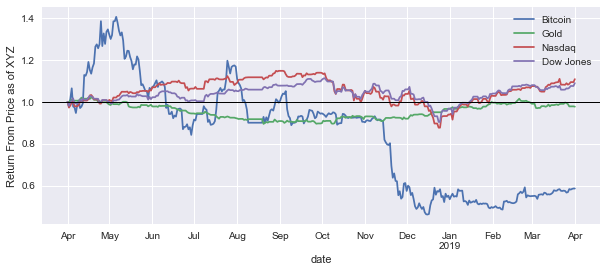

In [111]:
#alternative visualisation to the above, by normalising data
normbtcvstraditional=btc[['BTC Price','Gold in USD','Nasdaq composite index','DJI']]
normbtcvstraditional=normbtcvstraditional.rename(columns={'BTC Price':'Bitcoin', 'Gold in USD':'Gold', 'Nasdaq composite index':'Nasdaq', 'DJI':'Dow Jones'})
normbtcvstraditional=normbtcvstraditional.loc['2018-04-01':'2019-04-01']
returnfstart = normbtcvstraditional.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(10,4)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Price as of XYZ')

In [67]:
#pearson correlation coefficient between bitcoin and traditional assets over last 3 years  
bvtheatmap=btcvstraditional.pct_change().corr(method='pearson')
print(bvtheatmap)

            Bitcoin      Gold    Nasdaq  Dow Jones
Bitcoin    1.000000  0.020365  0.023230   0.028537
Gold       0.020365  1.000000 -0.091953  -0.107356
Nasdaq     0.023230 -0.091953  1.000000   0.876993
Dow Jones  0.028537 -0.107356  0.876993   1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

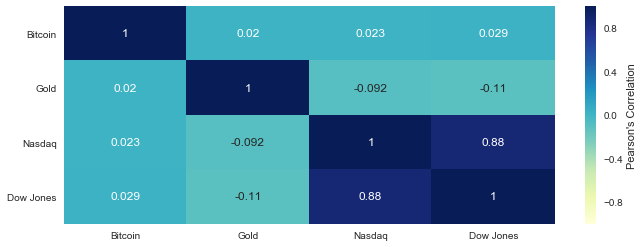

In [69]:
#visualise the correlation
sns.heatmap(bvtheatmap, xticklabels=bvtheatmap.columns, yticklabels=bvtheatmap.columns, cbar_kws={'label': "Pearson's Correlation"}, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0) 


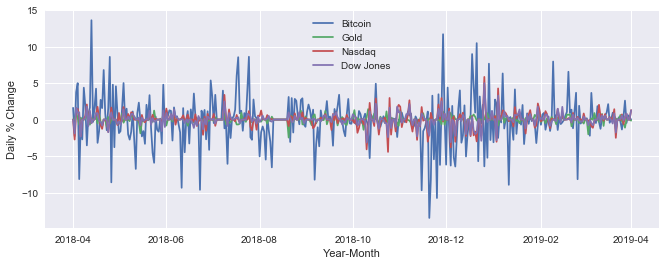

In [92]:
#compare bitcoin daily returns with traditional commodities and stock indices over last 3 years
btcvstraditional=btc[['BTC Price','Gold in USD','Nasdaq composite index','DJI']]
btcvstraditional=btcvstraditional.rename(columns={'BTC Price':'Bitcoin', 'Gold in USD':'Gold', 'Nasdaq composite index':'Nasdaq', 'DJI':'Dow Jones'})
btcvstraditionalDR=btcvstraditional.pct_change().mul(100)
start, end = '2018-04-01', '2019-04-01'
fig, ax = plt.subplots()
ax.plot(btcvstraditionalDR.loc[start:end, 'Bitcoin'])
ax.plot(btcvstraditionalDR.loc[start:end, 'Gold'])
ax.plot(btcvstraditionalDR.loc[start:end, 'Nasdaq'])
ax.plot(btcvstraditionalDR.loc[start:end, 'Dow Jones'])
ax.set_ylabel('Daily % Change')
ax.set_xlabel('Year-Month')
ax.legend();

Text(0,0.5,'Observations')

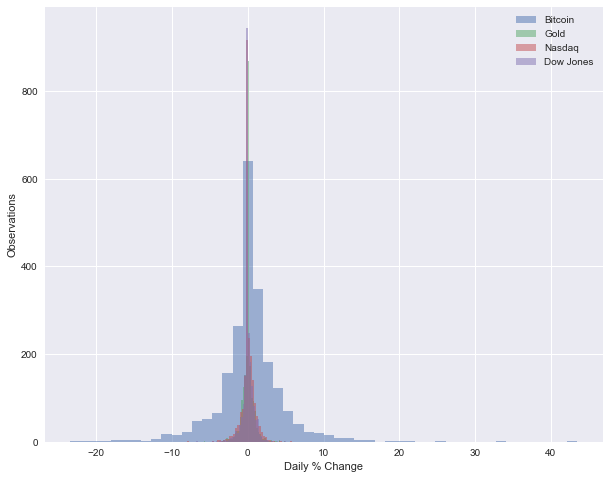

In [135]:
#Alternative visualisation for above
btcvstraditionalDR['Bitcoin'].hist(bins=50, label='Bitcoin', figsize=(10,8), alpha=0.5)
btcvstraditionalDR['Gold'].hist(bins=50, label='Gold', alpha=0.5)
btcvstraditionalDR['Nasdaq'].hist(bins=50, label='Nasdaq', alpha=0.5)
btcvstraditionalDR['Dow Jones'].hist(bins=50, label='Dow Jones', alpha=0.5)
plt.legend();
plt.xlabel('Daily % Change')
plt.ylabel('Observations')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


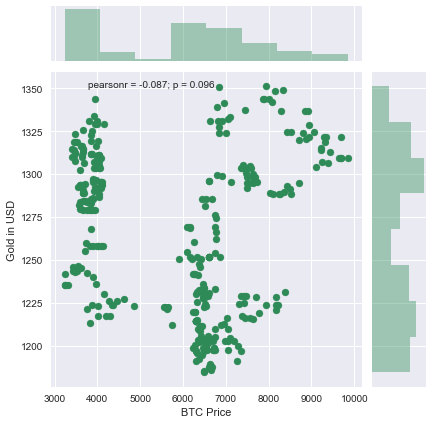

In [115]:
#Alternative correlation plot for BTC against GOLD
jointplot=btc.loc['2018-04-01':'2019-04-01']
sns.jointplot('BTC Price', 'Gold in USD', jointplot, kind='scatter', color='seagreen')


In [95]:
#pearson correlation coefficient between bitcoin and bitcoin specific variables  
btcvariable=btc[['BTC Price','BTC network hashrate','Average BTC block size','NUAU - BTC','Number TX - BTC','Difficulty - BTC','TX fees - BTC','Estimated TX Volume USD - BTC']]
btcvariableheatmap=btcvariable.corr(method='pearson')
print(btcvariableheatmap)

                               BTC Price  BTC network hashrate  \
BTC Price                       1.000000              0.654832   
BTC network hashrate            0.654832              1.000000   
Average BTC block size          0.565088              0.524016   
NUAU - BTC                      0.655544              0.440238   
Number TX - BTC                 0.512293              0.462393   
Difficulty - BTC                0.636876              0.992518   
TX fees - BTC                   0.485521             -0.028255   
Estimated TX Volume USD - BTC   0.880258              0.380408   

                               Average BTC block size  NUAU - BTC  \
BTC Price                                    0.565088    0.655544   
BTC network hashrate                         0.524016    0.440238   
Average BTC block size                       1.000000    0.918391   
NUAU - BTC                                   0.918391    1.000000   
Number TX - BTC                              0.937441    0.9

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

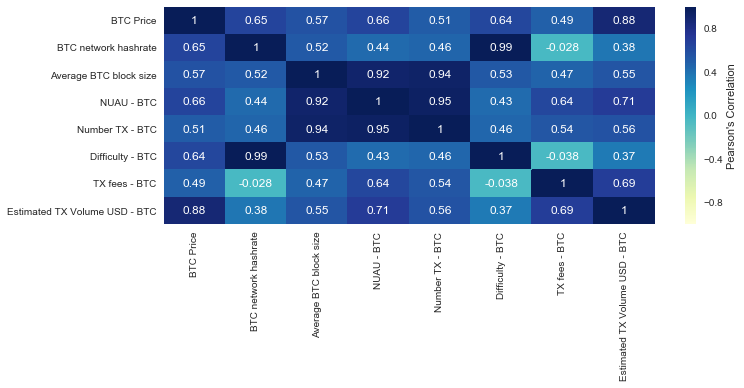

In [96]:
#visualise the above
sns.heatmap(btcvariableheatmap, xticklabels=btcvariableheatmap.columns, yticklabels=btcvariableheatmap.columns, cbar_kws={'label': "Pearson's Correlation"}, cmap="YlGnBu", vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


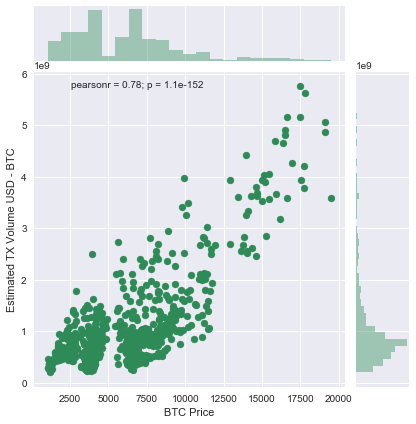

In [118]:
#plot volume and price on same chart
volpricejointplot=btc.loc['2017-04-01':'2019-04-01']
sns.jointplot('BTC Price', 'Estimated TX Volume USD - BTC', volpricejointplot, kind='scatter', color='seagreen')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


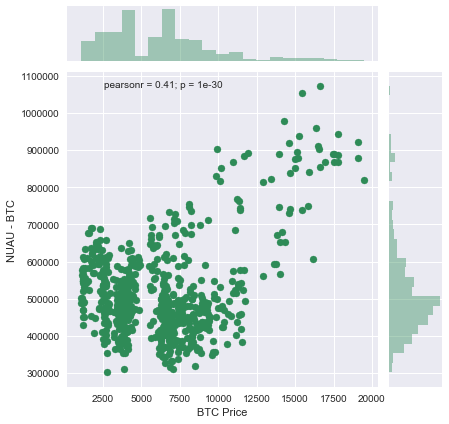

In [130]:
#plot NUAU and price on same chart
volpricejointplot=btc.loc['2017-04-01':'2019-04-01']
sns.jointplot('BTC Price', 'NUAU - BTC', volpricejointplot, kind='scatter', color='seagreen')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


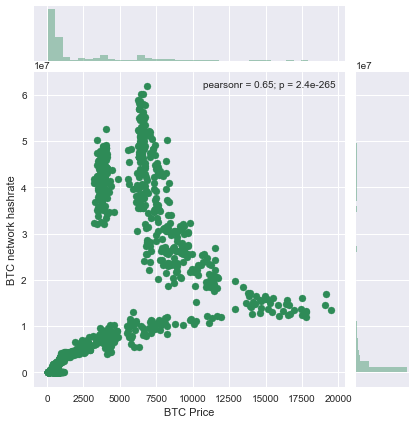

In [139]:
#plot hashrate and price on same chart
volpricejointplot=btc.loc['2013-04-28':'2019-04-01']
sns.jointplot('BTC Price', 'BTC network hashrate', volpricejointplot, kind='scatter', color='seagreen')

Text(0,0.5,'TX Vol (USD)')

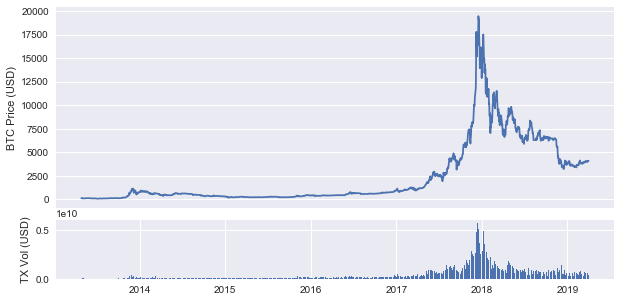

In [131]:
#BTC price & Estimated TX Volume
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(btc.index, btc['BTC Price']) 
bottom.bar(btc.index, btc['Estimated TX Volume USD - BTC']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_ylabel('BTC Price (USD)')
bottom.set_ylabel('TX Vol (USD)')

Text(0,0.5,'NUAU')

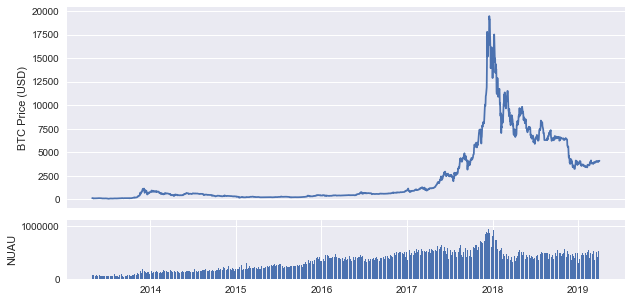

In [132]:
#BTC price & NUAU
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(btc.index, btc['BTC Price']) 
bottom.bar(btc.index, btc['NUAU - BTC']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_ylabel('BTC Price (USD)')
bottom.set_ylabel('NUAU')

Text(0,0.5,'BTC hashrate')

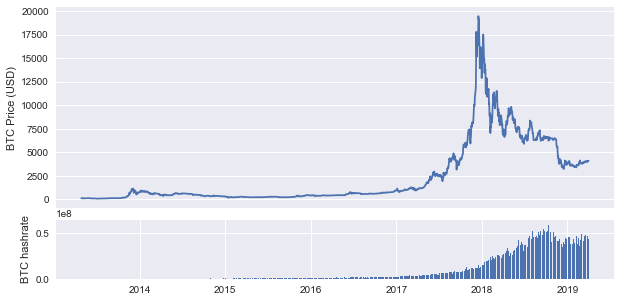

In [140]:
#BTC price & Hashrate
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(btc.index, btc['BTC Price']) 
bottom.bar(btc.index, btc['BTC network hashrate']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_ylabel('BTC Price (USD)')
bottom.set_ylabel('BTC hashrate')

Text(0,0.5,'% change as of XYZ')

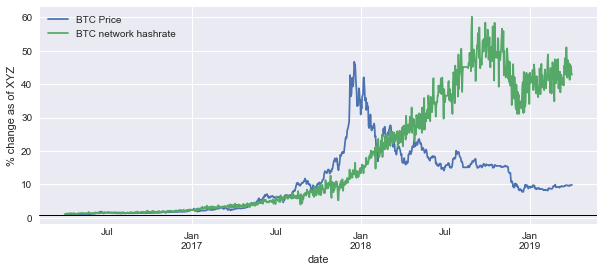

In [143]:
#hashrate and price chart
btcvariableHP=btcvariable[['BTC Price','BTC network hashrate']]
btcvariableHP=btcvariableHP.loc['2016-04-01':'2019-04-01']
returnfstart = btcvariableHP.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(10,4)).axhline(1, lw=1, color='black')
plt.ylabel('% change as of XYZ')

In [20]:
#select sample period
sp = btc.loc['2019-04-01':'2018-04-01']
sp.head()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-04-01,4105.36,44078985.78,1.173566,373888,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.91,26258.42
2019-03-31,4105.46,44078985.78,1.204920,469689,377783,6.379270e+12,54.673729,352584524.1,NaN,142.14,60.64,168.64,0.071739,NaN,NaN
2019-03-30,4092.14,46615905.83,1.233981,517101,369817,6.379270e+12,63.482086,812699052.8,NaN,142.36,61.25,170.30,0.071257,NaN,NaN
2019-03-29,4068.30,46298790.82,1.217287,531559,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.32,25928.68
2019-03-28,4087.58,47250135.84,1.199630,527558,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.17,25717.46


In [92]:
#inferential analysis 
#LSTM RNN - https://github.com/sudharsan13296/Bitcoin-price-Prediction-using-LSTM/blob/master/.ipynb_checkpoints/Bitcoin%20price%20prediction%20(Time%20series)%20using%20LSTM%20RNN-checkpoint.ipynb
#Install tools required
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
x=btc.loc['2017-04-01':'2019-04-01']
lstmrnn = x[['BTC Price']]

In [94]:
lstmrnn = lstmrnn.values
lstmrnn = lstmrnn.astype('float32')
lstmrnn

array([[ 1071.71],
       [ 1080.61],
       [ 1102.95],
       [ 1145.52],
       [ 1134.14],
       [ 1125.81],
       [ 1178.94],
       [ 1172.65],
       [ 1176.57],
       [ 1187.3 ],
       [ 1187.46],
       [ 1204.81],
       [ 1201.02],
       [ 1170.33],
       [ 1167.3 ],
       [ 1172.61],
       [ 1183.25],
       [ 1193.77],
       [ 1212.13],
       [ 1211.08],
       [ 1229.42],
       [ 1222.71],
       [ 1231.92],
       [ 1209.63],
       [ 1250.45],
       [ 1265.99],
       [ 1281.88],
       [ 1317.74],
       [ 1317.84],
       [ 1321.87],
       [ 1348.3 ],
       [ 1421.03],
       [ 1453.78],
       [ 1490.72],
       [ 1540.87],
       [ 1556.81],
       [ 1579.47],
       [ 1596.92],
       [ 1723.89],
       [ 1756.52],
       [ 1780.37],
       [ 1845.76],
       [ 1723.12],
       [ 1800.86],
       [ 1808.44],
       [ 1741.7 ],
       [ 1726.73],
       [ 1818.7 ],
       [ 1897.37],
       [ 1984.24],
       [ 2067.03],
       [ 2043.19],
       [ 219

In [95]:
#rescale our data to the range of 0-to-1, using MinMaxScaler due to Neural networks being sensitive to input data
scaler = MinMaxScaler(feature_range=(0, 1))
lstmrnn = scaler.fit_transform(lstmrnn)
lstmrnn

array([[0.00000000e+00],
       [4.83591110e-04],
       [1.69745088e-03],
       [4.01052460e-03],
       [3.39218602e-03],
       [2.93957070e-03],
       [5.82642481e-03],
       [5.48465177e-03],
       [5.69764897e-03],
       [6.28067181e-03],
       [6.28936663e-03],
       [7.23209605e-03],
       [7.02616200e-03],
       [5.35859540e-03],
       [5.19395992e-03],
       [5.48247620e-03],
       [6.06061146e-03],
       [6.63222745e-03],
       [7.62983039e-03],
       [7.57277384e-03],
       [8.56929645e-03],
       [8.20470229e-03],
       [8.70513543e-03],
       [7.49399140e-03],
       [9.71196964e-03],
       [1.05563514e-02],
       [1.14197470e-02],
       [1.33682303e-02],
       [1.33736618e-02],
       [1.35926344e-02],
       [1.50287338e-02],
       [1.89805664e-02],
       [2.07600631e-02],
       [2.27672271e-02],
       [2.54921652e-02],
       [2.63582803e-02],
       [2.75895186e-02],
       [2.85376869e-02],
       [3.54366936e-02],
       [3.72096710e-02],


In [49]:
#create train and test @ ratio of x:y
train_size = int(len(lstmrnn) * 0.67)
test_size = len(lstmrnn) - train_size
train, test = lstmrnn[0:train_size, :], lstmrnn[train_size:len(lstmrnn), :]
print(len(train), len(test))

489 242


In [50]:
#define the function called create_dataset, which takes two inputs: Dataset - numpy array that we want to convert into a dataset & look_back - number of previous time steps to use as input variables to predict the next time period
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [77]:
look_back = 30
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [78]:
trainX

array([[0.        , 0.00048359, 0.00169745, ..., 0.01336823, 0.01337366,
        0.01359263],
       [0.00048359, 0.00169745, 0.00401052, ..., 0.01337366, 0.01359263,
        0.01502873],
       [0.00169745, 0.00401052, 0.00339219, ..., 0.01359263, 0.01502873,
        0.01898057],
       ...,
       [0.27942216, 0.2901513 , 0.28845057, ..., 0.37375876, 0.38563985,
        0.38763723],
       [0.2901513 , 0.28845057, 0.3002023 , ..., 0.38563985, 0.38763723,
        0.38849357],
       [0.28845057, 0.3002023 , 0.3002023 , ..., 0.38763723, 0.38849357,
        0.3862995 ]], dtype=float32)

In [79]:
trainY

array([0.01502873, 0.01898057, 0.02076006, 0.02276723, 0.02549217,
       0.02635828, 0.02758952, 0.02853769, 0.03543669, 0.03720967,
       0.03850557, 0.04205859, 0.03539485, 0.03961891, 0.04003077,
       0.03640441, 0.035591  , 0.04058826, 0.04486286, 0.04958301,
       0.05408147, 0.05278609, 0.0608479 , 0.06790122, 0.07468612,
       0.06787513, 0.06110382, 0.05337782, 0.05910208, 0.06431451,
       0.06061044, 0.06610596, 0.07239261, 0.07726598, 0.08020392,
       0.07828097, 0.08797665, 0.09767775, 0.0895877 , 0.09431219,
       0.09543695, 0.10164589, 0.10223326, 0.08743709, 0.08939154,
       0.0775844 , 0.07595378, 0.07836846, 0.08604828, 0.0802713 ,
       0.08256589, 0.08898674, 0.08798698, 0.08887319, 0.09056738,
       0.08343473, 0.08252841, 0.07643628, 0.08048864, 0.08127815,
       0.07973935, 0.07720514, 0.07415146, 0.07752897, 0.08092169,
       0.08319674, 0.08348091, 0.08350754, 0.0787086 , 0.08155254,
       0.07897919, 0.07140696, 0.06852065, 0.07232034, 0.07003

In [80]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [81]:
#Build the model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1446
Epoch 2/100
 - 0s - loss: 0.1313
Epoch 3/100
 - 0s - loss: 0.1184
Epoch 4/100
 - 0s - loss: 0.1062
Epoch 5/100
 - 0s - loss: 0.0953
Epoch 6/100
 - 0s - loss: 0.0842
Epoch 7/100
 - 0s - loss: 0.0742
Epoch 8/100
 - 0s - loss: 0.0650
Epoch 9/100
 - 0s - loss: 0.0569
Epoch 10/100
 - 0s - loss: 0.0491
Epoch 11/100
 - 0s - loss: 0.0422
Epoch 12/100
 - 0s - loss: 0.0361
Epoch 13/100
 - 0s - loss: 0.0307
Epoch 14/100
 - 0s - loss: 0.0259
Epoch 15/100
 - 0s - loss: 0.0218
Epoch 16/100
 - 0s - loss: 0.0185
Epoch 17/100
 - 0s - loss: 0.0156
Epoch 18/100
 - 0s - loss: 0.0132
Epoch 19/100
 - 0s - loss: 0.0114
Epoch 20/100
 - 0s - loss: 0.0097
Epoch 21/100
 - 0s - loss: 0.0087
Epoch 22/100
 - 0s - loss: 0.0078
Epoch 23/100
 - 0s - loss: 0.0072
Epoch 24/100
 - 0s - loss: 0.0068
Epoch 25/100
 - 0s - loss: 0.0065
Epoch 26/100
 - 0s - loss: 0.0063
Epoch 27/100
 - 0s - loss: 0.0063
Epoch 28/100
 - 0s - loss: 0.0063
Epoch 29/100
 - 0s - loss: 0.0063
Epoch 30/100
 - 0s - lo

In [82]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [83]:
#We invert the predictions before calculating error to so that reports will be in same units as our original data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [84]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore)) #Lower values of RMSE indicate better fit

Train Score: 1292.00 RMSE
Test Score: 538.82 RMSE


In [85]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(lstmrnn)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [86]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(lstmrnn)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(lstmrnn) - 1, :] = testPredict


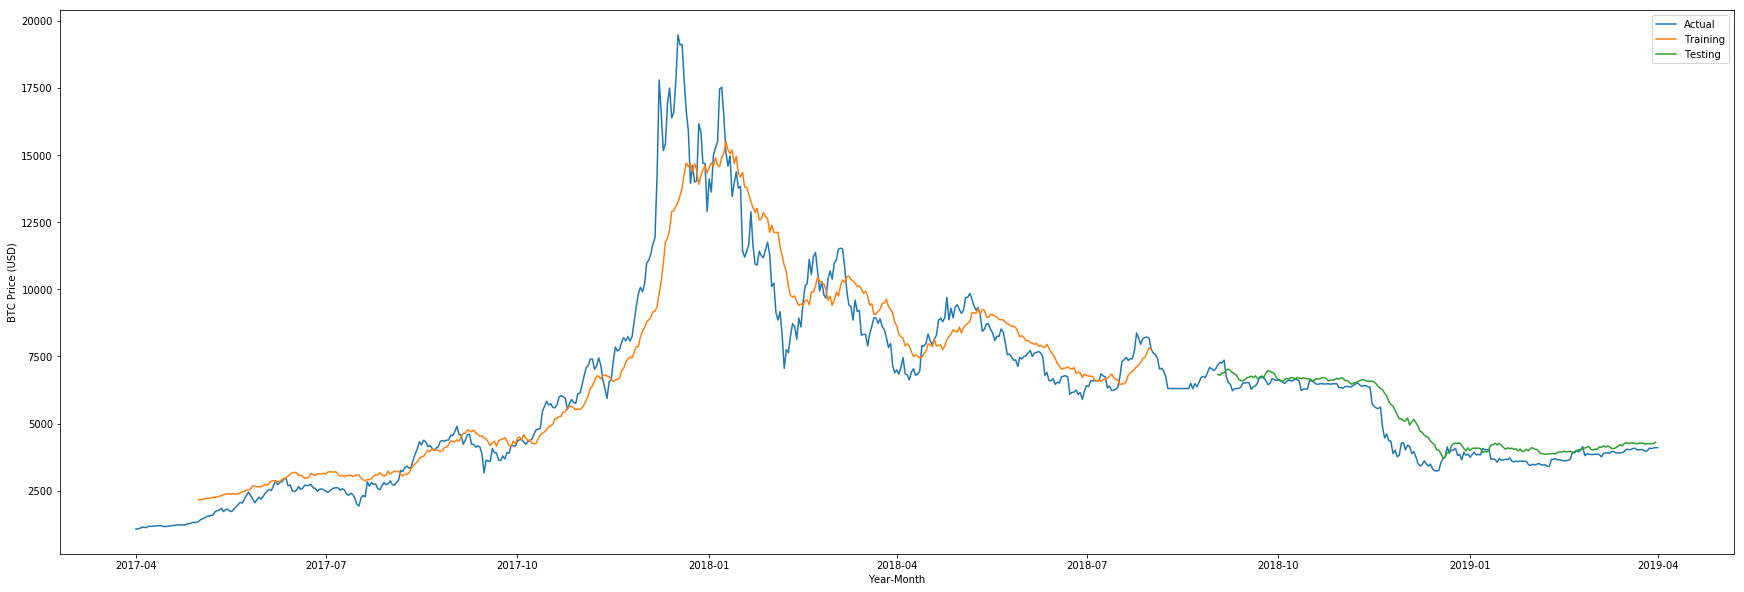

In [96]:
#Visualise results
plt.plot(x['BTC Price'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=x.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=x.index).close, label='Testing')
plt.rcParams["figure.figsize"]=[30,10]
plt.legend();
plt.xlabel('Year-Month')
plt.ylabel('BTC Price (USD)')
plt.show()

In [ ]:
#https://github.com/rahulworld/bitcoin-prediction - bunch of different models but not great explainers

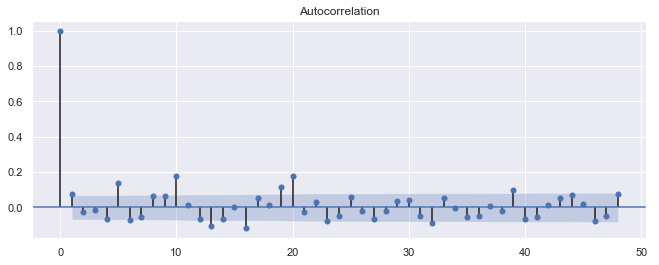

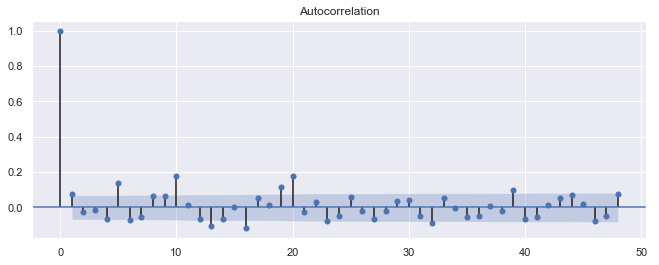

In [21]:
#https://github.com/manthanthakker/BitcoinPrediction/blob/master/BitcoinPredictionRNN.ipynb
#autocorrelation
arimaxday=btc['2017':].fillna(method='ffill')['BTC Price']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arimaxday.diff().dropna(), lags= 48, alpha=0.05)
#plt.xlabel('Lags')

In [22]:
#Arima Model
from statsmodels.tsa.stattools import adfuller
adfuller(arimaxday)[1]


0.24577790086482776

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train,test = train_test_split(arimaxday,test_size=0.24,shuffle=False)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arimaxday, order=(4,4))
result = mod.fit()

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARMA(history,order=(5,1))
    model_fit = mod.fit()
    yhat = model_fit.forecast()
    yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(yhat_p)
    # observation
    obs = test[i] 
    history.append(obs)
    print(str(yhat_p)+' '+' '+ str(history[-4:])+' '+str(obs)+' '+str(i)+' ')


6506.026752441173  [6354.24, 6515.41, 6509.4, 6536.68] 6536.68 0 
6499.202231543066  [6515.41, 6509.4, 6536.68, 6514.06] 6514.06 1 
6513.086221806164  [6509.4, 6536.68, 6514.06, 6280.91] 6280.91 2 
6282.296472099887  [6536.68, 6514.06, 6280.91, 6371.85] 6371.85 3 
6346.004206961157  [6514.06, 6280.91, 6371.85, 6398.85] 6398.85 4 
6416.907608978376  [6280.91, 6371.85, 6398.85, 6513.87] 6513.87 5 
6545.653516433275  [6371.85, 6398.85, 6513.87, 6735.05] 6735.05 6 
6692.17820088034  [6398.85, 6513.87, 6735.05, 6715.32] 6715.32 7 
6735.087155316616  [6513.87, 6735.05, 6715.32, 6704.77] 6704.77 8 
6689.003956403364  [6735.05, 6715.32, 6704.77, 6603.64] 6603.64 9 
6558.584362806166  [6715.32, 6704.77, 6603.64, 6452.79] 6452.79 10 
6473.215945553261  [6704.77, 6603.64, 6452.79, 6495.29] 6495.29 11 
6487.150925247748  [6603.64, 6452.79, 6495.29, 6678.75] 6678.75 12 
6688.393613078171  [6452.79, 6495.29, 6678.75, 6643.1] 6643.1 13 
6645.753945300403  [6495.29, 6678.75, 6643.1, 6604.71] 6604.71 1

3593.815728386726  [3686.97, 3658.87, 3557.31, 3704.22] 3704.22 121 
3680.0226755220096  [3658.87, 3557.31, 3704.22, 3631.51] 3631.51 122 
3664.35681502249  [3557.31, 3704.22, 3631.51, 3651.87] 3651.87 123 
3674.4446817184626  [3704.22, 3631.51, 3651.87, 3677.99] 3677.99 124 
3645.6892578394454  [3631.51, 3651.87, 3677.99, 3652.38] 3652.38 125 
3704.590653538481  [3651.87, 3677.99, 3652.38, 3725.45] 3725.45 126 
3726.4675274065958  [3677.99, 3652.38, 3725.45, 3600.37] 3600.37 127 
3581.621004980883  [3652.38, 3725.45, 3600.37, 3575.08] 3575.08 128 
3608.8612503396052  [3725.45, 3600.37, 3575.08, 3605.56] 3605.56 129 
3607.6280829614097  [3600.37, 3575.08, 3605.56, 3584.5] 3584.5 130 
3602.170249859022  [3575.08, 3605.56, 3584.5, 3607.39] 3607.39 131 
3614.0731345500135  [3605.56, 3584.5, 3607.39, 3599.72] 3599.72 132 
3609.3055102309986  [3584.5, 3607.39, 3599.72, 3604.69] 3604.69 133 
3620.5150159315663  [3607.39, 3599.72, 3604.69, 3584.28] 3584.28 134 
3585.7675460348755  [3599.72, 3

In [24]:
pd.concat([pd.DataFrame(predictions,index=test.index,columns=['predictions']),test],axis=1)

,predictions,BTC Price
date,,
2018-09-16,6506.026752,6536.68
2018-09-17,6499.202232,6514.06
2018-09-18,6513.086222,6280.91
2018-09-19,6282.296472,6371.85
2018-09-20,6346.004207,6398.85
2018-09-21,6416.907609,6513.87
2018-09-22,6545.653516,6735.05
2018-09-23,6692.178201,6715.32
2018-09-24,6735.087155,6704.77


In [26]:
import math
error=math.sqrt(mean_squared_error(test,predictions))
error

139.51069483061664

In [27]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arimaxday, order=(4,4))
result = mod.fit()

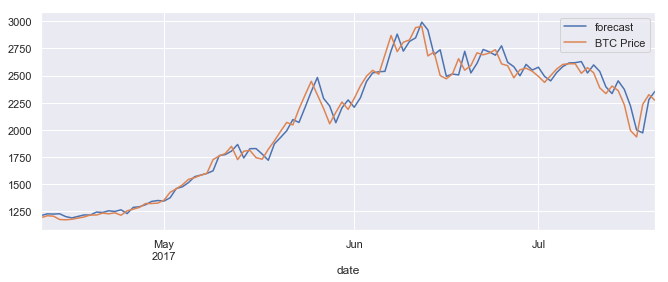

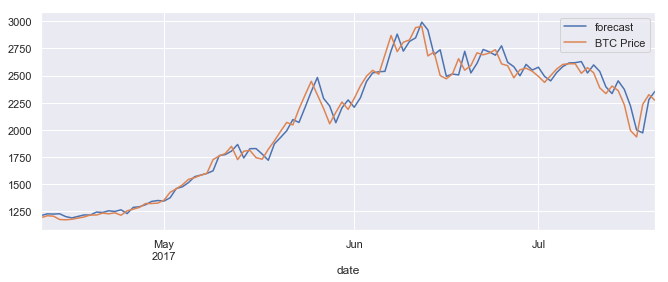

In [29]:
result.plot_predict(start=100,end=200)

                              ARMA Model Results                              
Dep. Variable:              BTC Price   No. Observations:                  821
Model:                     ARMA(4, 4)   Log Likelihood               -6006.048
Method:                       css-mle   S.D. of innovations            362.732
Date:                Thu, 11 Jul 2019   AIC                          12032.096
Time:                        11:59:54   BIC                          12079.201
Sample:                    01-01-2017   HQIC                         12050.170
                         - 04-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5565.1152   2066.955      2.692      0.007    1513.958    9616.273
ar.L1.BTC Price    -0.1187      0.250     -0.475      0.635      -0.609       0.371
ar.L2.BTC Price     0.3066      

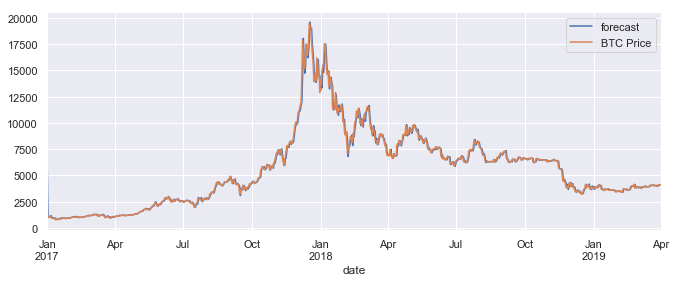

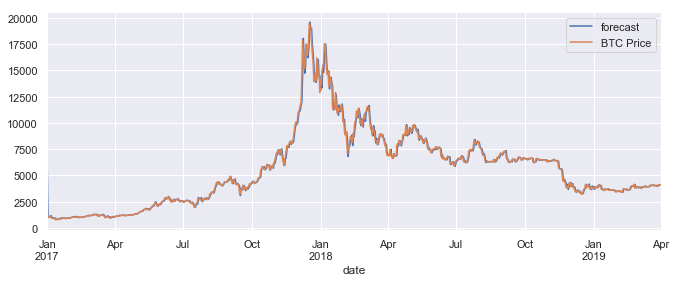

In [30]:
print(result.summary())
result.plot_predict()